# eBay Kleinanzeigen Classified Section

In this data cleaning and analysis project, a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website is assessed with the aim to decipher insights into the nature and popularity of listed cars and how the prices are influenced/determined.

The dataset has 50,000 entries and 20 colums mostly with ofject-type data. Only 20% of the columns have numeric data specifically int type. The information given in the dataset are marked by the following columns:

- **dateCrawled** - When this ad was first crawled. 
- **name** - Name of the car.
- **seller** - Whether the seller is private or a dealer.
- **offerType** - The type of listing
- **price** - The price on the ad to sell the car.
- **abtest** - Whether the listing is included in an A/B test.
- **vehicleType** - The vehicle Type.
- **yearOfRegistration** - The year in which the car was first registered.
- **gearbox** - The transmission type.
- **powerPS** - The power of the car in PS.
- **model** - The car model name.
- **kilometer** - How many kilometers the car has driven.
- **monthOfRegistration** - The month in which the car was first registered.
- **fuelType** - What type of fuel the car uses.
- **brand** - The brand of the car.
- **notRepairedDamage** - If the car has a damage which is not yet repaired.
- **dateCreated** - The date on which the eBay listing was created.
- **nrOfPictures** - The number of pictures in the ad.
- **postalCode** - The postal code for the location of the vehicle.
- **lastSeenOnline** - When the crawler saw this ad last online.

On first, view data seemes to be primarily organised by the date the each entry was crawled (dateCrawled column). All field-values are taken from this date. Car name column looks cubersome.

In [1]:
import numpy as np
import pandas as pd

## preliminary look at data
autos = pd.read_csv('autos.csv', encoding='Latin-1')
autos.info()
autos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


### Renaming columns

To begin, a few columns are renamed from camelcase to snakecase, to keep with convention and to make it easier to read and understand.

In [2]:
autos.head()
autos.columns = autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
               'vehicle_type', 'registration_year', 'gear_box', 'powerPS', 'model',
               'odometer', 'registration_month', 'fuel_type', 'brand',
               'unrepaired_damage', 'ad_created', 'num_pictures', 'postal_code',
               'last_seen']

### Data Exploration

Next, the data is explored to determine what cleaning tasks will be needed.

In [3]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gear_box,powerPS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-16 21:50:53,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


- **price** and **odometer** columns are numeric values stored as text
- **seller**, **offer_type**, **ab_test**, **gear_box** and **unrepared_damage** have only 2 unique values and would need to be investigated further to determine if they contribute to the data analysis.
- **num_pictures** contains all non-num data without any other data description available. It will therefore have to be investigated further.

In [4]:
for car in ['seller', 'offer_type', 'ab_test', 'gear_box', 'unrepaired_damage']:
    print(autos[car].value_counts())
    print('\n')
    
print(autos['num_pictures'].head(5))
print(autos['num_pictures'].value_counts())

privat        49999
gewerblich        1
Name: seller, dtype: int64


Angebot    49999
Gesuch         1
Name: offer_type, dtype: int64


test       25756
control    24244
Name: ab_test, dtype: int64


manuell      36993
automatik    10327
Name: gear_box, dtype: int64


nein    35232
ja       4939
Name: unrepaired_damage, dtype: int64


0    0
1    0
2    0
3    0
4    0
Name: num_pictures, dtype: int64
0    50000
Name: num_pictures, dtype: int64


For the **seller**, **offer_type**, only one entry varies from the rest (1/50,000), suggesting that this data point does not add much varying and therefore, situanally relevant information. 

Privat means 'private' and gewerblick means 'public'. Implying that almost all the entries in the dataset were from private sellers.

Angebot stands for 'offer', while gesuch stands for 'request'. Implying that almost all entries are sales from offers rather than requests.

**num_pictures** is an empty column.

These columns will therefore be removed.

In [5]:
rem_columns = ['seller', 'offer_type', 'num_pictures']

autos.drop(rem_columns, axis=1, inplace=True)
autos.shape

(50000, 17)

### Converting columns to numeric dtype

Non-numeric characters are removed from the **price** and **odometer** columns to convert them to numeric dtype.

In [6]:
autos['price']= autos['price'].str.replace("$","").str.replace(",","").astype(int)
autos['odometer']=autos['odometer'].str.replace('km','').str.replace(",","").astype(int)
autos.rename({'odometer':'odometer_km', 'price':'price_usd'}, axis=1, inplace=True)

### Identifying outliers and removing them
To identify outliers in these columns, they are studied further.

In [7]:
print(autos[['price_usd','odometer_km']].describe())

print('\n')
print(autos['price_usd'].value_counts())
print('\n')
print(autos['odometer_km'].value_counts())

          price_usd    odometer_km
count  5.000000e+04   50000.000000
mean   9.840044e+03  125732.700000
std    4.811044e+05   40042.211706
min    0.000000e+00    5000.000000
25%    1.100000e+03  125000.000000
50%    2.950000e+03  150000.000000
75%    7.200000e+03  150000.000000
max    1.000000e+08  150000.000000


0        1421
500       781
1500      734
2500      643
1000      639
         ... 
20790       1
8970        1
846         1
2895        1
33980       1
Name: price_usd, Length: 2357, dtype: int64


150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64


For the price column, the minimum price of 0 suggests a car was given for free and might skew the data unneccesarily. However this might not be as because only 1421(3%) entries were for USD 0. 
The maximum price is USD 100,000,000  which is significantly higher than even the 75th percentile which is 7,200USD. 
The standard deviation is also quite high and raises concern. The data may need to be stripped by price outliers. 



For the odometer readings, the 25th & 75th percentile and maximum are all the same: 150,000km. This makes sense as value_counts shows that 64.8% of the entries have that reading. This might be the maximum odometer reading accepted for this classifieds section.

#### Removing price outliers
A lower limit for removing the price outliers could be 1 to remove no-cost (USD 0) entries. An upper limit is determined using an interquatile range of 25-75%. 

In [8]:
price_25, price_75 = (1100, 7200) # 25th and 75th percentiles

IQR = price_75 - price_25 # the interquartile range
upper_limit = price_75 + (1.5*IQR) # given by the IQR rule

autos = autos[autos['price_usd'].between(1, upper_limit)]

print(autos['price_usd'].describe())
print('\n')
print('Removed entries:', 50000 - autos.shape[0])

count    44795.000000
mean      4089.433620
std       3841.429247
min          1.000000
25%       1150.000000
50%       2700.000000
75%       5999.000000
max      16350.000000
Name: price_usd, dtype: float64


Removed entries: 5205


It should be noted that the number of entries reduced by 5205. 

The variation of the dataset has also significantly improved as the standard deviation has reduced from USD 480,000 to 3800. Also the difference between the 75th percentile and max value is more proportionate to the difference between the other percentiles, unlike before.

### Cleaning the date columns

There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. We can differentiate by referring to the data dictionary:


- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

In [9]:
print(autos[['date_crawled','ad_created','last_seen']][0:5])
autos[['date_crawled','ad_created','last_seen']].describe()

          date_crawled           ad_created            last_seen
0  2016-03-26 17:47:46  2016-03-26 00:00:00  2016-04-06 06:45:54
1  2016-04-04 13:38:56  2016-04-04 00:00:00  2016-04-06 14:45:08
2  2016-03-26 18:57:24  2016-03-26 00:00:00  2016-04-06 20:15:37
3  2016-03-12 16:58:10  2016-03-12 00:00:00  2016-03-15 03:16:28
4  2016-04-01 14:38:50  2016-04-01 00:00:00  2016-04-01 14:38:50


,date_crawled,ad_created,last_seen
count,44795,44795,44795
unique,43358,73,36473
top,2016-03-08 10:40:35,2016-04-03 00:00:00,2016-04-07 06:17:27
freq,3,1738,8


It is noticed that the first 10 characters represent the day. To understand the date range, the date values can be extracted.

In [10]:
print('unique dates per column \n')
for column in ['date_crawled','ad_created','last_seen']:
    print(column,':', autos[column].str[:10].unique().size)
    

unique dates per column 

date_crawled : 34
ad_created : 73
last_seen : 34


This narrows down the date range significantly and the date range for each column can be studied.

#### Date Crawled

First we observe the counts of the individual dates to see the crawls per day from 2016-03-05 to 2016-04-07.

In [11]:
autos['date_crawled'].str[:10].value_counts().sort_index()

2016-03-05    1143
2016-03-06     627
2016-03-07    1617
2016-03-08    1507
2016-03-09    1484
2016-03-10    1465
2016-03-11    1455
2016-03-12    1675
2016-03-13     699
2016-03-14    1657
2016-03-15    1531
2016-03-16    1342
2016-03-17    1433
2016-03-18     572
2016-03-19    1532
2016-03-20    1689
2016-03-21    1666
2016-03-22    1466
2016-03-23    1455
2016-03-24    1316
2016-03-25    1434
2016-03-26    1460
2016-03-27    1376
2016-03-28    1558
2016-03-29    1532
2016-03-30    1517
2016-03-31    1415
2016-04-01    1469
2016-04-02    1567
2016-04-03    1726
2016-04-04    1629
2016-04-05     580
2016-04-06     142
2016-04-07      59
Name: date_crawled, dtype: int64

This data can be better represeneted and appreciated visualised in a time line plot.

Text(0.5, 1.0, 'Date Distribution of Car Ads Crawled')

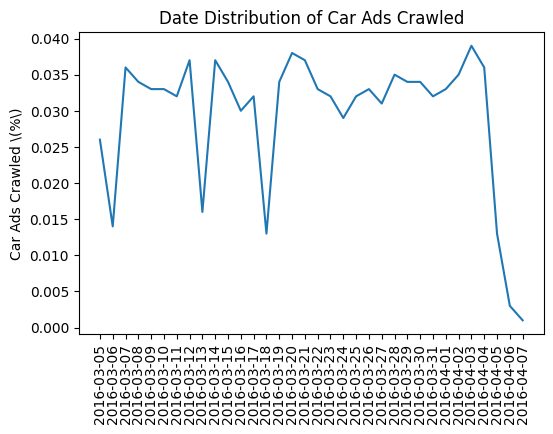

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

date_crawled = (autos['date_crawled']
                     .str[:10]
                     .value_counts(normalize=True, dropna=False)
                     .round(3)
                     .sort_index()
                )
    
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(date_crawled.index, date_crawled.values)
# ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.xticks(rotation=90)
ax.set_ylabel("Car Ads Crawled \(%\)")
ax.set_title("Date Distribution of Car Ads Crawled")

The trend of ad crawling for the approximate two month period is observed to be steady between 0.03 and 0.035% representing roughly 1100-1300 ads per day during the week and marked with sharp drops at interval weekends.

#### Ad created

Again, we observe the counts of the individual dates to see the number of ads created per day as a percentage of the total.

Text(0.5, 1.0, 'Date Distribution of Car Ads Created')

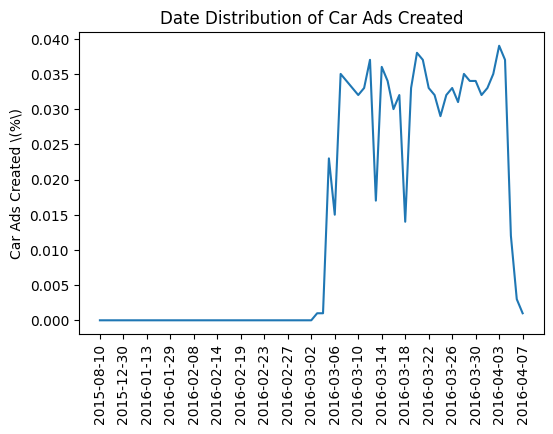

In [47]:
%matplotlib inline

ad_created = (autos['ad_created']
                     .str[:10]
                     .value_counts(normalize=True, dropna=False)
                     .round(3)
                     .sort_index()
                )
    
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(ad_created.index, ad_created.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
ax.set_ylabel("Car Ads Created \(%\)")
ax.set_title("Date Distribution of Car Ads Created")

The ad creation timeline is seen to start and end in August 10 2015, and April 7, 2016 respectively. The listings were relatively sparse until a noticable spike in March 5 2016 (my birthday, yay!). Exoectedly, the ad creation spike date coincides with the date the first group of ads from the website were crawled.


Text(0.5, 1.0, 'Date Distribution of Car Ads Crawled')

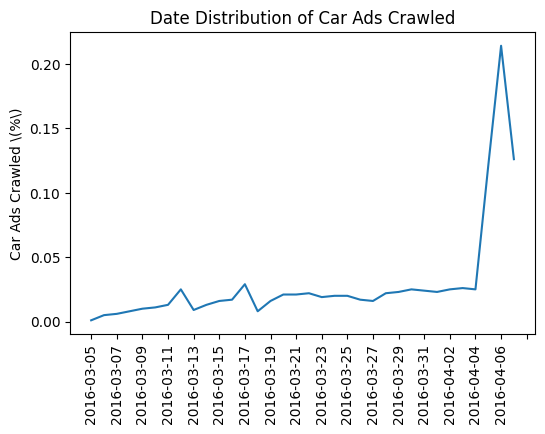

In [49]:
%matplotlib inline

last_seen = (autos['last_seen']
                     .str[:10]
                     .value_counts(normalize=True, dropna=False)
                     .round(3)
                     .sort_index()
                )
    
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(last_seen.index, last_seen.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
ax.set_ylabel("Car Ads Crawled \(%\)")
ax.set_title("Date Distribution of Car Ads Crawled")

The number of last seen ads were relatively uniform throughout the crawling period. However, it appears that the crawler noticed an increase in ad disappearances in the last days of the cycle from April 5 - April 7, 2016.
This may be an indicator of the crawlers activity rather than the ads themselves a conclusion cannot be drawn from this.

#### Registration Month and Year

In [51]:
autos[['registration_month', 'registration_year']].describe()

,registration_month,registration_year
count,44795.000000,44795.00000
mean,5.744012,2003.97339
std,3.707064,74.81955
min,0.000000,1000.00000
25%,3.000000,1999.00000
50%,6.000000,2003.00000
75%,9.000000,2007.00000
max,12.000000,9999.00000


The minimum value is 1000 and then maximum value is 9999 which are both impossible. You really shouldn't ask why. A more realistic timeline would be the invention year of the mordern car and the year the ads were crawled which are 1945 to 2016 respectively.

In [58]:
impossible_years = (~(autos['registration_year'].between(1945,2016))).sum()

round(100*(impossible_years/len(autos)))

4.0

Since this is only 4% of the data, their removal is safe. We can then visualise the valid registration dates.

In [59]:
autos = autos[autos['registration_year'].between(1945,2016)]

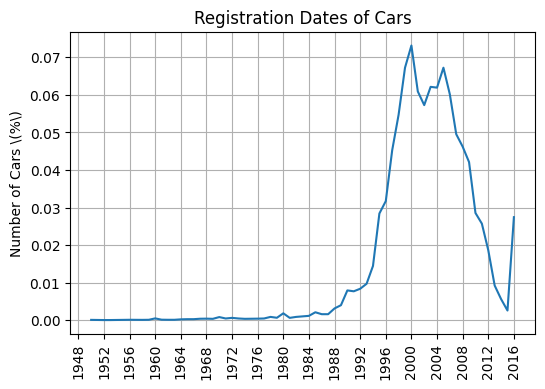

In [126]:
%matplotlib inline

registration_year = (autos['registration_year']
                     .value_counts(normalize=True, dropna=False)
                     .sort_index()
                )
    
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(registration_year.index, registration_year.values)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=90)
ax.set_ylabel("Number of Cars \(%\)")
ax.set_title("Registration Dates of Cars")
ax.grid()

Very few of the cars were registered before 1990 and most of them were registered in the early 2000s (2000-2006). This suggests that the cars are not too old.

#### Car brand names

 When working with data on cars, it's natural to explore variations across different car brands. 

In [68]:
autos['brand'].value_counts(normalize=True).sort_values(ascending=False).head(20)

volkswagen        0.214828
opel              0.115168
bmw               0.103549
mercedes_benz     0.088134
audi              0.077586
ford              0.073092
renault           0.050761
peugeot           0.032180
fiat              0.027756
seat              0.019094
skoda             0.016998
mazda             0.016090
nissan            0.015787
smart             0.015368
citroen           0.015042
toyota            0.013366
hyundai           0.010548
volvo             0.009337
mitsubishi        0.008709
sonstige_autos    0.008383
Name: brand, dtype: float64

In [71]:
0.214828+0.115168+0.103549+0.088134+0.077586

0.599265

The most popular brands are Volkswagen (21%), Opel (about 12%), BMW (10%), Mercedes Benz (9%) and Audi (8%) which are German brands. They make up 59.9% of the data and can therefore be aggregated. 

Orrrr.. plot twist... we aggregate the others. Let's look at how the top 10 compare to the rest in terms of average prices.

In [121]:
german = (autos['brand'].value_counts().sort_values(ascending=False).head(10).index)

mean_dict = {}

for brand in german:
    mean = autos['price_usd'][autos['brand']==brand].mean()
    mean_dict[brand] = round(mean,2)

mean_dict

{'volkswagen': 4183.02,
 'opel': 2713.86,
 'bmw': 5647.89,
 'mercedes_benz': 5260.0,
 'audi': 5703.9,
 'ford': 2943.51,
 'renault': 2282.23,
 'peugeot': 2967.95,
 'fiat': 2740.82,
 'seat': 3747.8}

In [122]:
other_brands = autos['brand'].value_counts(normalize=True).sort_values(ascending=False).tail(30).index

other_mean_dict = {}
other_mean_list = []
for brand in other_brands:
    mean = autos['price_usd'][autos['brand']==brand].mean()
    other_mean_dict[brand] = round(mean,2)
    other_mean_list.append(mean)

other_brands_mean = sum(other_mean_list)/len(other_mean_list)
mean_dict['others'] = other_brands_mean

Text(0, 0.5, 'Mean Price (USD)')

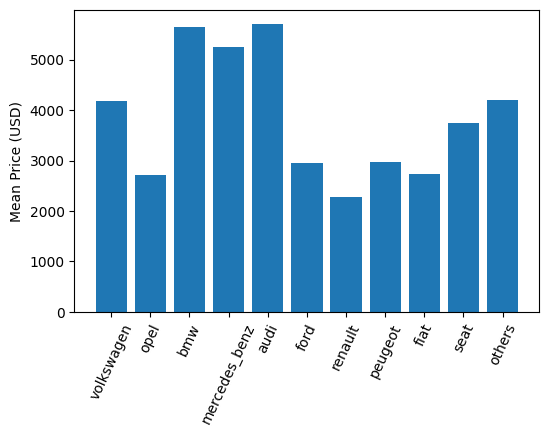

In [129]:
%matplotlib inline

mean_price_series = pd.Series(mean_dict)
    
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(mean_price_series.index, mean_price_series.values)
# ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=65)
ax.set_ylabel("Mean Price (USD)")
# ax.set_title("Registration Dates of Cars")
# ax.grid()

The german brands other than Opel (BMW, Mercedes Benz and Audi) are noticably more expensive than the other brands. This is interesting given they are also the most popular. Also, aren't german cars supposed to be cheaper than foreign ones when you're living in germany?

#### Car Mileage Values

It'll be interesting to see if there's any link with mean price and the car mileage. 
For the top 6 brands, aggregation  can be used to understand the average mileage for those cars. 

In [138]:
top_brands = autos['brand'].value_counts(normalize=True).sort_values(ascending=False).head(6).index

mile_mean_dict = {}
price_mean_dict = {}

for brand in top_brands:
    mean_price = autos['price_usd'][autos['brand']==brand].mean()
    mean_mile = autos['odometer_km'][autos['brand']==brand].mean()
    mile_mean_dict[brand] = round(mean_mile,2)
    price_mean_dict[brand] = round(mean_price,2)



mile_mean_series = pd.Series(mile_mean_dict)
price_mean_series = pd.Series(price_mean_dict)

new_df = pd.DataFrame(mile_mean_series, columns=['mean_mileage_km'])
new_df['mean_price_usd'] = price_mean_series

new_df

,mean_mileage_km,mean_price_usd
volkswagen,132813.25,4183.02
opel,130527.70,2713.86
bmw,138863.28,5647.89
mercedes_benz,138446.50,5260.00
audi,139701.38,5703.90
ford,127043.64,2943.51


Text(0, 0.5, 'Mean Price (USD)')

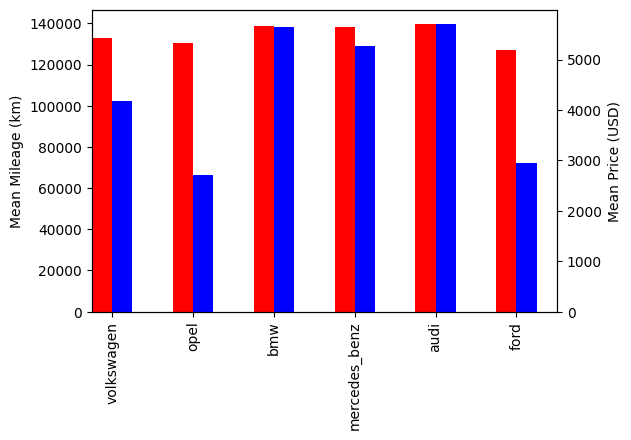

In [145]:
%matplotlib inline
    
fig = plt.figure()
ax = fig.add_subplot()
ax2 = ax.twinx()

width = 0.25

new_df.mean_mileage_km.plot(kind='bar', color='red', ax=ax, width=width, position=1)
new_df.mean_price_usd.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

# ax.xaxis.set_major_locator(plt.MaxNLocator(20))
plt.xticks(rotation=65)
ax.set_ylabel("Mean Mileage (km)")
ax2.set_ylabel("Mean Price (USD)")


# ax.set_title("Registration Dates of Cars")
# ax.grid()

The mileage of the cars do not vary significantly accross the brands. Increasing mileage is expected to be related lower pricing however this interdependency isn't observed. In this scenario, more costly cars have more mileage than cheaper ones. Volkswagen again has a slightly lower mileage and the balance between cost and mileage could be the reason for its high used car market share.

## Conclusion

The analysis of eBay Kleinanzeigen's classifieds section mainly investigated the influence of price and mileage on a car's overall value indicated by its popularity. The most popular car brands on the website were also factored in. 

German brands were found to be the most popular, especially, Volkswagen cars. This popularity is tentatively attributed to a balance between popularity, mileage and price.

Although expected to for most used car deals, milege and price did not have a definitve indirect proportionality relationship. This is a key finding that will be relevant to propective buyers from the site. 